In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
import os
from PIL import Image

parent_dir = r'C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train'
images = []
for image_dir in os.listdir(parent_dir):
    image_dir=os.path.join(parent_dir,image_dir)
    image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('jpg', 'png', 'jpeg'))]

    
    for image_file in image_files:
        image = Image.open(image_file)
        images.append((image_file, image))


In [12]:
img_paths=[image[0] for image in images]

In [155]:
# Load the reference image (the one to match against)
reference_image = cv2.imread(r"C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\test\short-sleeve\short-sleeve-t-shirt92_jpg.rf.753a2f19fbc45adc3e292b6b0bad3fdb.jpg")

# Load the list of images
loaded_images = [cv2.imread(img) for img in img_paths]


In [156]:
# Define the fixed size (width, height)
fixed_size = (224, 224)  # Example size, can be adjusted

# Function to resize an image
def resize_image(image, size):
    return cv2.resize(image, size)

In [157]:
# Resize all images to the fixed size
resized_images = [resize_image(img, fixed_size) for img in loaded_images]
reference_image=resize_image(reference_image,fixed_size)

In [158]:
def mse(imageA, imageB):
    # Compute the mean squared error between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
errors=[]
for img in resized_images:
    error = mse(reference_image, img)
    errors.append(error)
    print(f'MSE with reference image: {error}')


MSE with reference image: 30307.18999123087
MSE with reference image: 19824.658203125
MSE with reference image: 28220.790437659438
MSE with reference image: 36248.77656648597
MSE with reference image: 34925.97929288903
MSE with reference image: 32497.953922193876
MSE with reference image: 18131.757932079083
MSE with reference image: 15875.966159119898
MSE with reference image: 23347.22004544005
MSE with reference image: 19965.41139190051
MSE with reference image: 43513.75621811225
MSE with reference image: 45229.77694515306
MSE with reference image: 20009.319893973214
MSE with reference image: 19594.495356345662
MSE with reference image: 24622.410016741072
MSE with reference image: 25293.572026466838
MSE with reference image: 44639.077228156886
MSE with reference image: 30655.36186623087
MSE with reference image: 48015.158960459186
MSE with reference image: 33441.30046237245
MSE with reference image: 36431.61120854592
MSE with reference image: 39682.5371492347
MSE with reference image:

In [159]:
path_img_error_tuple=list(zip(img_paths,resized_images,errors))

In [160]:
print(len(img_paths))
print(len(loaded_images))
print(len(errors))

334
334
334


In [161]:
path_img_error_tuple.sort(key=lambda x: x[2])
image_list=[x[1] for x in path_img_error_tuple]

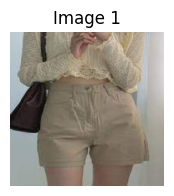

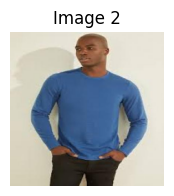

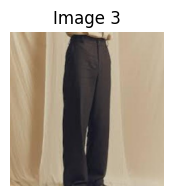

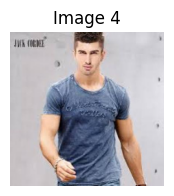

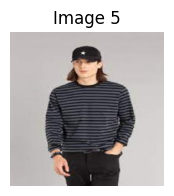

In [162]:
# Convert images from BGR (OpenCV default) to RGB for correct display with matplotlib
rgb_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in image_list]

# Display images using matplotlib
for i, img in enumerate(rgb_images[:5]):
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(f'Image {i+1}')
    plt.axis('off')  # Hide axes
    plt.show()

In [163]:
from sklearn.metrics.pairwise import cosine_similarity

reference_image_vector = reference_image.flatten()

most_similar = -1
most_similar_img = ""
for path, img, err in path_img_error_tuple:
    img_vector = img.flatten()
    print(img_vector.shape)
    similarity = cosine_similarity([reference_image_vector], [img_vector])[0][0]
    if similarity > most_similar:
        most_similar = similarity
        most_similar_img = img


(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)


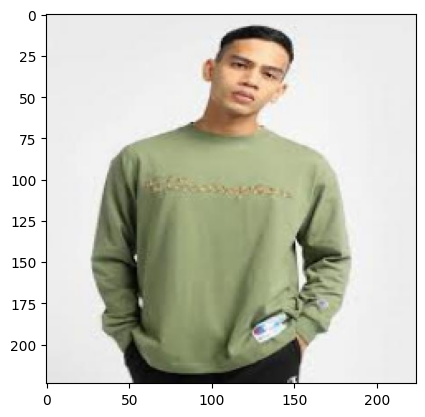

In [164]:
most_similar_img=cv2.cvtColor(most_similar_img, cv2.COLOR_BGR2RGB)
plt.imshow(most_similar_img)